In [7]:
# Import Dependencies
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt


## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [10]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('../Resources/HREmployeeAttrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
# Select our independent X variables, and our dependent y variable. 
X = df.drop(columns = ['Attrition'])
y = df['Attrition']

In [13]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))

Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


### Imbalanced

In [16]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =5)

In [17]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y_test.value_counts())
print("")
print("Percentage:")
print(y_test.value_counts(normalize=True))

Total Counts:
0    245
1     49
Name: Attrition, dtype: int64

Percentage:
0    0.833333
1    0.166667
Name: Attrition, dtype: float64


In [18]:
# Create a Linear Regression model object
model = LogisticRegression(solver='liblinear')


In [19]:
# Train the model using the training datasets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [20]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

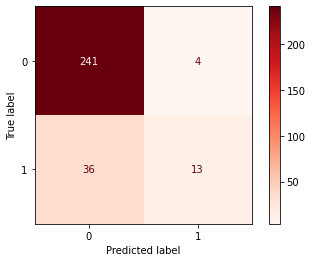

In [21]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

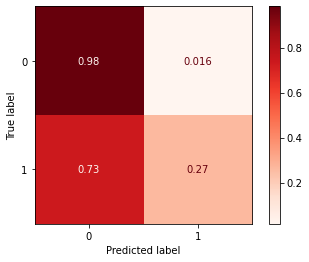

In [22]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [57]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))

              precision    recall  f1-score   support

   Attrition       0.59      0.83      0.69        12
No Attrition       0.71      0.42      0.53        12

    accuracy                           0.62        24
   macro avg       0.65      0.62      0.61        24
weighted avg       0.65      0.62      0.61        24



### Balanced

In [49]:
# Create our Validation training and testing datasets with balancing.
#A[At] = df.drop(columns = ['Attrition'])
B = df[df['Attrition'] == 0].iloc[:47]
A = df[df['Attrition'] == 1].iloc[:47]
x = pd.concat([A, B], ignore_index=True)
X = x.drop(columns = ['Attrition'])
y = x['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)


In [61]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y_test.value_counts())
print("")
print("Percentage:")
print(y_test.value_counts(normalize=True))

Total Counts:
1    12
0    12
Name: Attrition, dtype: int64

Percentage:
1    0.5
0    0.5
Name: Attrition, dtype: float64


In [51]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [52]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [53]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

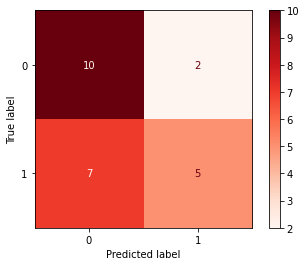

In [54]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

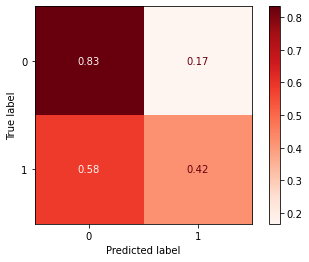

In [55]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')


In [58]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))


              precision    recall  f1-score   support

   Attrition       0.59      0.83      0.69        12
No Attrition       0.71      0.42      0.53        12

    accuracy                           0.62        24
   macro avg       0.65      0.62      0.61        24
weighted avg       0.65      0.62      0.61        24

